In [74]:
import numpy as np
import cv2
import matplotlib
from matplotlib import pyplot as plt
%matplotlib inline

Sampling of Image and testing cv2 for detecting facial features

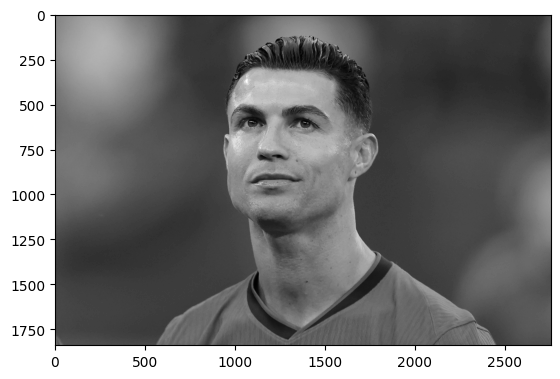

In [75]:
img = cv2.imread('./images/Cristiano_Ronaldo/000005.jpg')
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
plt.imshow(gray, cmap='gray')

Instantiating openCV HAAR cascades

In [87]:
face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')
eye_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_eye.xml')
cv2.ocl.setUseOpenCL(False)
faces = face_cascade.detectMultiScale(gray, 1.3, 5)
(x,y,w,h) = faces[0]

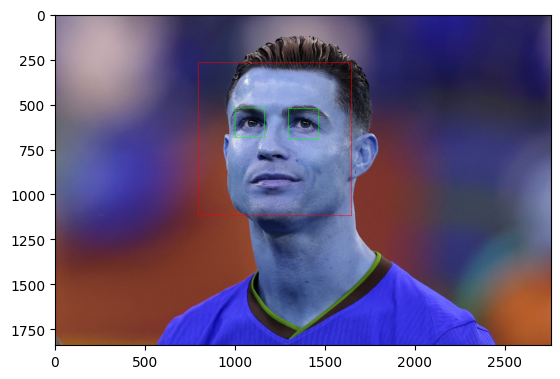

In [88]:
face_image = cv2.rectangle(img, (x,y), (x+w,y+h), (255,0,0), 2)
plt.imshow(face_image)

In [ ]:
import base64
import cv2

import matplotlib.pyplot as plt

cv2.destroyAllWindows()

for (x, y, w, h) in faces:
    face_img = cv2.rectangle(img, (x, y), (x + w, y + h), (255, 0, 0), 2)
    roi_gray = gray[y:y + h, x:x + w]
    roi_color = face_img[y:y + h, x:x + w]

    eyes = eye_cascade.detectMultiScale(roi_gray, scaleFactor=1.1, minNeighbors=10)
    for (ex, ey, ew, eh) in eyes:
        cv2.rectangle(roi_color, (ex, ey), (ex + ew, ey + eh), (0, 255, 0), 2)

# Encode the image to base64
retval, buffer = cv2.imencode('.jpg', face_img)
jpg_as_text = base64.b64encode(buffer).decode()


/9j/4AAQSkZJRgABAQAAAQABAAD/2wBDAAIBAQEBAQIBAQECAgICAgQDAgICAgUEBAMEBgUGBgYFBgYGBwkIBgcJBwYGCAsICQoKCgoKBggLDAsKDAkKCgr/2wBDAQICAgICAgUDAwUKBwYHCgoKCgoKCgoKCgoKCgoKCgoKCgoKCgoKCgoKCgoKCgoKCgoKCgoKCgoKCgoKCgoKCgr/wAARCADIAMgDASIAAhEBAxEB/8QAHwAAAQUBAQEBAQEAAAAAAAAAAAECAwQFBgcICQoL/8QAtRAAAgEDAwIEAwUFBAQAAAF9AQIDAAQRBRIhMUEGE1FhByJxFDKBkaEII0KxwRVS0fAkM2JyggkKFhcYGRolJicoKSo0NTY3ODk6Q0RFRkdISUpTVFVWV1hZWmNkZWZnaGlqc3R1dnd4eXqDhIWGh4iJipKTlJWWl5iZmqKjpKWmp6ipqrKztLW2t7i5usLDxMXGx8jJytLT1NXW19jZ2uHi4+Tl5ufo6erx8vP09fb3+Pn6/8QAHwEAAwEBAQEBAQEBAQAAAAAAAAECAwQFBgcICQoL/8QAtREAAgECBAQDBAcFBAQAAQJ3AAECAxEEBSExBhJBUQdhcRMiMoEIFEKRobHBCSMzUvAVYnLRChYkNOEl8RcYGRomJygpKjU2Nzg5OkNERUZHSElKU1RVVldYWVpjZGVmZ2hpanN0dXZ3eHl6goOEhYaHiImKkpOUlZaXmJmaoqOkpaanqKmqsrO0tba3uLm6wsPExcbHyMnK0tPU1dbX2Nna4uPk5ebn6Onq8vP09fb3+Pn6/9oADAMBAAIRAxEAPwCS2lnYLfxSrHvkJZFbOAO5B4PtTr+OS3QxOTdEqPJkQ79oPUZHQ8dDSrc6daKEhVpgWxMWTgDA7fUn61LbTkTRG0kijLLywAxtGcgjpmg7Dz342eKB8NPhnqOpX99NBbRQBIWtyJCGcqiKueGOXA+gr8uvjFFp2tfE7Uddutei

In [91]:
def get_cropped_image_if_2_eyes(image_path):
    img = cv2.imread(image_path)
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    faces = face_cascade.detectMultiScale(gray, 1.3, 5)

    for (x, y, w, h) in faces:
        roi_gray = gray[y:y+h, x:x+w]
        roi_color = img[y:y+h, x:x+w]
        eyes = eye_cascade.detectMultiScale(roi_gray)
        if len(eyes) >= 2:
            return roi_color
        
# plt.imshow(get_cropped_image_if_2_eyes('./images/cropped/Cristiano_Ronaldo/000001.jpg'), cmap='gray')
# plt.show()


Create a new directory and save the cropped images there

In [92]:
path_to_dataset = './images/'
path_to_cropped_dataset = './images/cropped/'

import os
import shutil

img_dirs = []

for entry in os.scandir(path_to_dataset):
    if entry.is_dir():
        img_dirs.append(entry.path)

if os.path.exists(path_to_cropped_dataset):
    shutil.rmtree(path_to_cropped_dataset)
os.mkdir(path_to_cropped_dataset)

for img_dir in img_dirs:
    count = 1
    celeb_name = img_dir.split('/')[-1]
    cropped_person_dir = os.path.join(path_to_cropped_dataset, celeb_name)
    print(f"Processing {celeb_name} images...")
    os.mkdir(cropped_person_dir)

    for entry in os.scandir(img_dir):
        if entry.is_file():
            cropped_img = get_cropped_image_if_2_eyes(entry.path)
            if cropped_img is not None:
                cv2.imwrite(os.path.join(cropped_person_dir, os.path.basename(entry.path)), cropped_img)
                print(f"Saved {os.path.basename(entry.path)} to {cropped_person_dir}")

Processing Arijit_Singh images...
Saved 000002.jpg to ./images/cropped/Arijit_Singh
Saved 000003.jpg to ./images/cropped/Arijit_Singh
Saved 000020.jpg to ./images/cropped/Arijit_Singh
Saved 000036.jpg to ./images/cropped/Arijit_Singh
Saved 000037.jpg to ./images/cropped/Arijit_Singh
Saved 000038.jpg to ./images/cropped/Arijit_Singh
Saved 000042.png to ./images/cropped/Arijit_Singh
Processing Cristiano_Ronaldo images...
Saved 000001.jpg to ./images/cropped/Cristiano_Ronaldo
Saved 000003.jpg to ./images/cropped/Cristiano_Ronaldo
Saved 000004.jpg to ./images/cropped/Cristiano_Ronaldo
Saved 000005.jpg to ./images/cropped/Cristiano_Ronaldo
Saved 000009.jpg to ./images/cropped/Cristiano_Ronaldo
Saved 000011.jpg to ./images/cropped/Cristiano_Ronaldo
Saved 000013.jpg to ./images/cropped/Cristiano_Ronaldo
Saved 000015.jpg to ./images/cropped/Cristiano_Ronaldo
Saved 000016.jpg to ./images/cropped/Cristiano_Ronaldo
Saved 000018.jpg to ./images/cropped/Cristiano_Ronaldo
Saved 000019.png to ./image

Feature Extraction using Wavelet Transform

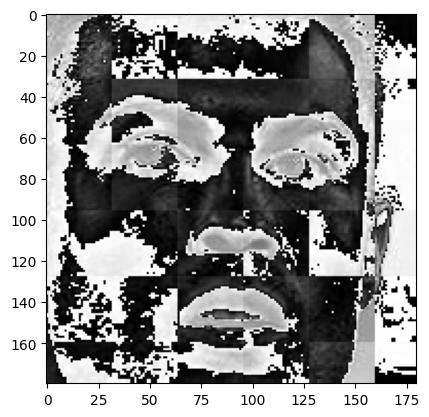

In [93]:
import pywt

def w2d(img, mode='haar', level=1):
    imArray = img
    imArray = cv2.cvtColor(imArray, cv2.COLOR_RGB2GRAY)
    imArray = np.float32(imArray)
    imArray /= 255

    # Get coefficients
    coeffs = pywt.wavedec2(imArray, mode, level=level)
    coeffs_H = list(coeffs)
    coeffs_H[0] *= 0  # remove approximation (blur)

    imArray_H = pywt.waverec2(coeffs_H, mode)
    imArray_H *= 255
    imArray_H = np.uint8(imArray_H)

    return imArray_H


# Sample image to test the wavelet transform
plt.imshow(w2d(get_cropped_image_if_2_eyes('./images/cropped/Cristiano_Ronaldo/000001.jpg'),'db1', 5), cmap='gray')

We assign a class ID to each celebrity and create a dict of wavelet transformed images with their corresponding labels/class IDs. These are then divided into X & Y lists and saved correspondingly for further training to model

In [103]:
base_path = "images/cropped"

class_dict = {}
X, y = [], []
count = 0

for celebrity_name in os.listdir(base_path):
    celebrity_path = os.path.join(base_path, celebrity_name)
    if not os.path.isdir(celebrity_path):
        continue

    # Assign class ID
    class_dict[count] = celebrity_name
    count += 1

    # Process each image in the folder
    for image_file in os.listdir(celebrity_path):
        image_path = os.path.join(celebrity_path, image_file)
        img = cv2.imread(image_path)

        if img is None:
            continue

        try:
            scalled_raw_img = cv2.resize(img, (32, 32))
            img_har = w2d(img, 'db1', 5)
            scalled_img_har = cv2.resize(img_har, (32, 32))

            combined_img = np.vstack((
                scalled_raw_img.reshape(32*32*3, 1),
                scalled_img_har.reshape(32*32, 1)
            ))

            X.append(combined_img)
            y.append(count)
        except Exception as e:
            print(f"Error processing image {image_path}: {e}")

X

[array([[103],
        [158],
        [254],
        ...,
        [253],
        [195],
        [248]], dtype=uint8),
 array([[95],
        [88],
        [88],
        ...,
        [ 1],
        [ 2],
        [20]], dtype=uint8),
 array([[59],
        [88],
        [93],
        ...,
        [12],
        [ 0],
        [ 1]], dtype=uint8),
 array([[226],
        [252],
        [251],
        ...,
        [174],
        [130],
        [  0]], dtype=uint8),
 array([[216],
        [226],
        [230],
        ...,
        [130],
        [151],
        [ 82]], dtype=uint8),
 array([[ 59],
        [ 25],
        [ 25],
        ...,
        [247],
        [  7],
        [  0]], dtype=uint8),
 array([[ 70],
        [ 66],
        [  7],
        ...,
        [243],
        [239],
        [  0]], dtype=uint8),
 array([[28],
        [22],
        [57],
        ...,
        [ 6],
        [ 2],
        [ 0]], dtype=uint8),
 array([[ 47],
        [ 43],
        [ 44],
        ...,
        [226],
 

In [95]:
# Reshape the data for trainin

X = np.array(X).reshape(len(X),4096).astype(float)
X

array([[103., 158., 254., ..., 253., 195., 248.],
       [ 95.,  88.,  88., ...,   1.,   2.,  20.],
       [ 59.,  88.,  93., ...,  12.,   0.,   1.],
       ...,
       [  2.,   1.,   1., ...,   3., 235., 215.],
       [ 54.,  81., 101., ...,   0.,   0.,   0.],
       [127., 125., 131., ...,  32., 171.,  18.]])

Testing performance of SVM with rbf kernel for our usecase.

In [96]:
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report


X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

pipe = Pipeline([('scalar', StandardScaler()), ('svc', SVC(kernel='linear', C=1))])
pipe.fit(X_train, y_train)
pipe.score(X_test, y_test)

0.8275862068965517

In [104]:
print(classification_report(y_test, pipe.predict(X_test), target_names=class_dict.values()))

NotFittedError: This StandardScaler instance is not fitted yet. Call 'fit' with appropriate arguments before using this estimator.

Using GridSearchCV to identify best model and its corresponding parameters

In [98]:
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import GridSearchCV


model_params = {
    'svm': {
        'model': svm.SVC(gamma='auto',probability=True),
        'params' : {
            'svc__C': [1,10,100,1000],
            'svc__kernel': ['rbf','linear']
        }  
    },
    'random_forest': {
        'model': RandomForestClassifier(),
        'params' : {
            'randomforestclassifier__n_estimators': [1,5,10]
        }
    },
    'logistic_regression' : {
        'model': LogisticRegression(solver='liblinear',multi_class='auto'),
        'params': {
            'logisticregression__C': [1,5,10]
        }
    }
}



scores = []
best_estimators = {}
import pandas as pd
for algo, mp in model_params.items():
    pipe = make_pipeline(StandardScaler(), mp['model'])
    clf =  GridSearchCV(pipe, mp['params'], cv=5, return_train_score=False)
    clf.fit(X_train, y_train)
    scores.append({
        'model': algo,
        'best_score': clf.best_score_,
        'best_params': clf.best_params_
    })
    best_estimators[algo] = clf.best_estimator_
    
df = pd.DataFrame(scores,columns=['model','best_score','best_params'])
df


c:\Users\bhavi\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
c:\Users\bhavi\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
c:\Users\bhavi\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
c:\Users\bhavi\AppData\Local\Programs\Python\P

,model,best_score,best_params
0,svm,0.822059,"{'svc__C': 1, 'svc__kernel': 'linear'}"
1,random_forest,0.631618,{'randomforestclassifier__n_estimators': 10}
2,logistic_regression,0.763235,{'logisticregression__C': 10}


In [99]:
best_clf = best_estimators['svm']

Saving the Trained model

In [102]:
import pickle

# joblib.dump(best_clf, 'celeb_svm_model.pkl')
with open('celeb_svm_model.pkl', 'wb') as f:
    pickle.dump(best_clf, f)

Saving class labels as dictionary for future use in API server

In [105]:
import json
with open("class_dictionary.json","w") as f:
    f.write(json.dumps(class_dict))